In [ ]:
#!pip install -q jupyternotify

In [ ]:
#%load_ext jupyternotify

## Read in the music into one file

The given code is a Python script that uses the mido library to read MIDI files from various sub-folders (presumably each representing a composer) within a base directory called "POP909". The code populates a list, midi, with the MIDI data from each file.

In [5]:
import mido
import os

# Base directory where all composers' folders are located
base_filepath = "POP909"

# Initializing an empty list to hold all the MIDI files
all_midis = []

# Looping through all the composers' folders
for composer in os.listdir(base_filepath):
    # Constructing the full path to the composer's folder
    composer_filepath = os.path.join(base_filepath, composer)

    # Checking if it's a directory before proceeding
    if os.path.isdir(composer_filepath):
        # Looping through all the files in the composer's folder
        for i in os.listdir(composer_filepath):
            if i.endswith(".mid"):
                tr = os.path.join(composer_filepath, i)
                midi = mido.MidiFile(tr) # Reading the MIDI file
                all_midis.append(midi)


## 1. Inspecting the MIDI File

Let have a look at the midi files and see what is in the new folder

In [6]:
print(midi)

MidiFile(type=1, ticks_per_beat=480, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=576923, time=0),
    MetaMessage('time_signature', numerator=1, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('set_tempo', tempo=578312, time=28009),
    MetaMessage('set_tempo', tempo=576923, time=7445),
    MetaMessage('set_tempo', tempo=578312, time=3602),
    MetaMessage('set_tempo', tempo=576923, time=7670),
    MetaMessage('set_tempo', tempo=578312, time=13884),
    MetaMessage('set_tempo', tempo=576923, time=12308),
    MetaMessage('end_of_track', time=1)]),
  MidiTrack([
    MetaMessage('track_name', name='MELODY', time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('note_on', channel=0, note=76, velocity=85, time=10529),
    Message('note_on', channel=0, note=76, velocity=0, time=69),
    Message('note_on', channel=0, note=77, velocity=78, time=51),
    Message('note_on', channel=0, note=77, velocity=0, time=

 # About output

Here's what each part is telling you:

MidiFile(type=1, ticks_per_beat=480, tracks=[...]): The MIDI file is of type 1, which means it has multiple tracks that are meant to be played synchronously. The ticks_per_beat value is 480, which tells us the timing resolution of the file, i.e., there are 480 ticks per quarter note beat.

First MidiTrack: This track primarily consists of meta-messages related to tempo:
<br>**set_tempo messages:** These messages define the tempo of the music in microseconds per beat. For example, 
<br>**tempo=576923** means that each beat lasts 576,923 microseconds or approximately 0.577 seconds.
<br>**time_signature message:** This sets the time signature of the music to 1/4, meaning that there is one beat per measure, and each beat is a quarter note. The clocks_per_click value of 24 and notated_32nd_notes_per_beat of 8 provide additional details about the timing.
<br>**end_of_track message:** This marks the end of the track.


Second MidiTrack:This track appears to represent a melody:
<br>**track_name meta-message:** This names the track "MELODY."
<br>**program_change message:** This sets the instrument sound to be used on channel 0. The value program=0 typically corresponds to a grand piano in the General MIDI standard.
<br>**note_on messages:** These messages signal the start of a note. For example, the message note_on, channel=0, note=76, velocity=85, time=10529 means that on channel 0, note number 76 (E6 in standard tuning) is played with a velocity (i.e., volume) of 85, 10,529 ticks after the previous event. The following note_on with velocity=0 is a common way to represent a note-off event, meaning the note is released.

Overall, this representation gives you a detailed look into the structure of the MIDI file, with insights into the tempo, timing, instrument sounds, and notes being played.

## 2. Playing the MIDI File

In [7]:
#starts from the beginning each time not from where you left off

# import mido
# from mido import MidiFile
# import tkinter as tk
# import threading

# class MidiPlayer:
#     def __init__(self, filename):
#         self.midi_file = MidiFile(filename)
#         self.playing = False

#     def play_midi(self):
#         with mido.open_output() as port:
#             for message in self.midi_file.play():
#                 if not self.playing:
#                     break
#                 port.send(message)

#     def play(self):
#         if not self.playing:
#             self.playing = True
#             threading.Thread(target=self.play_midi).start()

#     def stop(self):
#         self.playing = False

# def play():
#     player.play()
#     lbl_status.config(text="Playing")

# def stop():
#     player.stop()
#     lbl_status.config(text="Stopped")

# player = MidiPlayer('POP909/909/909.mid')

# root = tk.Tk()
# root.title("MIDI Player")

# frame_buttons = tk.Frame(root)
# frame_buttons.pack()

# btn_play = tk.Button(frame_buttons, text="Play", command=play)
# btn_play.pack(side=tk.LEFT)

# btn_stop = tk.Button(frame_buttons, text="Stop", command=stop)
# btn_stop.pack(side=tk.LEFT)

# lbl_status = tk.Label(root, text="Stopped")
# lbl_status.pack()

# root.mainloop()


## Play One of the Songs

In [8]:
# just comment out while reloading code because it plays everytime

# import mido
# from mido import MidiFile

# midi_file = MidiFile('POP909/909/909.mid')

# # Open output port with default backend
# with mido.open_output() as port:
#     for message in midi_file.play():
#         port.send(message)


## 3. Analyzing & Processing the MIDI Data

Use the first midi file as a tester to see what information is in the files

In [9]:
import pretty_midi

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI('POP909/909/909.mid')

# Print time signature changes
print("Time Signatures:")
for ts in midi_data.time_signature_changes:
    print(ts)

# Print tempo changes
print("\nTempo Changes:")
for tempo_change in midi_data.get_tempo_changes()[1]:
    print(tempo_change)

# Print instrument information
print("\nInstruments:")
for instrument in midi_data.instruments:
    print(f'Name: {instrument.name}, Program: {instrument.program}, Is drum: {instrument.is_drum}')

# Print some notes for the first instrument, if it has any
if midi_data.instruments:
    print("\nNotes for MELODY:")
    for note in midi_data.instruments[0].notes[:5]:  # Just the first 10 notes
        print(note)
        print(f"Duration: {note.end - note.start}")  # Adding duration
        
# Print some notes for the first instrument, if it has any
if midi_data.instruments:
    print("\nNotes for BRIDGE:")
    for note in midi_data.instruments[1].notes[:5]:  # Just the first 10 notes
        print(note)
        print(f"Duration: {note.end - note.start}")  # Adding duration
        
# Print some notes for the first instrument, if it has any
if midi_data.instruments:
    print("\nNotes for PIANO:")
    for note in midi_data.instruments[2].notes[:5]:  # Just the first 10 notes
        print(note)
        print(f"Duration: {note.end - note.start}")  # Adding duration


Time Signatures:
1/4 at 0.00 seconds

Tempo Changes:
104.00001386666852
103.75022479215373
104.00001386666852
103.75022479215373
104.00001386666852
103.75022479215373
104.00001386666852

Instruments:
Name: MELODY, Program: 0, Is drum: False
Name: BRIDGE, Program: 0, Is drum: False
Name: PIANO, Program: 0, Is drum: False

Notes for MELODY:
Note(start=12.655046, end=12.737979, pitch=76, velocity=85)
Duration: 0.08293268124999997
Note(start=12.799277, end=12.890623, pitch=77, velocity=78)
Duration: 0.09134614166666566
Note(start=12.943508, end=13.034854, pitch=79, velocity=74)
Duration: 0.09134614166666566
Note(start=13.231969, end=13.320912, pitch=77, velocity=78)
Duration: 0.08894229583333413
Note(start=13.520431, end=13.616585, pitch=76, velocity=81)
Duration: 0.09615383333333405

Notes for BRIDGE:
Note(start=1.116586, end=1.201923, pitch=76, velocity=80)
Duration: 0.0853365270833335
Note(start=1.260817, end=1.383413, pitch=77, velocity=74)
Duration: 0.1225961375000002
Note(start=1.405

Print out the unique information for all songs to see if there are major differences between each track to see if we need to preprocess that data to make it all uniform so it is easier for the transformer to read.

In [10]:
import pretty_midi
import os

# Base directory containing all the individual song folders
base_directory = 'POP909'

# Set to store unique instrument information
unique_instruments = set()

# Set to store unique time signature changes
unique_time_signatures = set()

# Iterate through all the subdirectories
for subdir, _, files in os.walk(base_directory):
    for file in files:
        # Check if the file has a .mid extension
        if file.endswith('.mid'):
            # Construct full path to MIDI file
            midi_path = os.path.join(subdir, file)

            # Load MIDI file into PrettyMIDI object
            midi_data = pretty_midi.PrettyMIDI(midi_path)

            # Collect unique time signatures
            for ts in midi_data.time_signature_changes:
                unique_time_signatures.add((ts.numerator, ts.denominator))

            # Collect information about piano instruments (program 0)
            for instrument in midi_data.instruments:
                if instrument.program == 0:
                    unique_instruments.add((instrument.name, instrument.program, instrument.is_drum))

# Print the unique instrument information
print("Unique Instruments:")
for info in unique_instruments:
    name, program, is_drum = info
    print(f"Instrument: {name}, Program: {program}, Is Drum: {is_drum}")

# Print the unique time signatures
print("\nUnique Time Signatures:")
for ts in unique_time_signatures:
    numerator, denominator = ts
    print(f"Time Signature: {numerator}/{denominator}")


Unique Instruments:
Instrument: PIANO, Program: 0, Is Drum: False
Instrument: Piano, Program: 0, Is Drum: False
Instrument: MELODY, Program: 0, Is Drum: False
Instrument: BRIDGE, Program: 0, Is Drum: False

Unique Time Signatures:
Time Signature: 4/4
Time Signature: 2/4
Time Signature: 3/4
Time Signature: 6/8
Time Signature: 1/4
Time Signature: 2/2


We can see that the names that were inputted for the instrument name were spelt wrong, in a different language, the name of the musician etc. However, they all have **Program: 0** and **Is Drum: False** which indicates that they are all piano music. Therefore, we will change the naming conventions going forward to clean the data a bit and only look at music with 4/4 Time Signature for ease. 

In [11]:
# Counter for the total number of songs modified
total_songs_modified = 0

# Iterate through all the subdirectories again to modify MIDI files
for subdir, _, files in os.walk(base_directory):
    for file in files:
        # Check if the file has a .mid extension and if the file does NOT start with "modified_"
        if file.endswith('.mid') and not file.startswith('modified_'):
            # Construct full path to MIDI file
            midi_path = os.path.join(subdir, file)

            # Load MIDI file into PrettyMIDI object
            midi_data = pretty_midi.PrettyMIDI(midi_path)

            # Check for 4/4 time signature
            is_four_by_four = any(ts.numerator == 4 and ts.denominator == 4 for ts in midi_data.time_signature_changes)

            if is_four_by_four:
                # Update instrument names and save the modified MIDI
                for instrument in midi_data.instruments:
                    if instrument.program == 0 and not instrument.is_drum:
                        instrument.name = "Piano"

                # Save the modified MIDI file; you can choose where to save it
                new_midi_path = os.path.join(subdir, "modified_" + file)
                midi_data.write(new_midi_path)
                print(new_midi_path)

                # Increment the counter for total number of songs modified
                total_songs_modified += 1

# Print the total number of songs modified
print(f"Total number of songs modified: {total_songs_modified}")

POP909\008\modified_008.mid
POP909\022\modified_022.mid
POP909\026\modified_026.mid
POP909\027\modified_027.mid
POP909\029\modified_029.mid
POP909\032\modified_032.mid
POP909\033\modified_033.mid
POP909\035\modified_035.mid
POP909\040\modified_040.mid
POP909\041\modified_041.mid
POP909\042\modified_042.mid
POP909\043\modified_043.mid
POP909\055\modified_055.mid
POP909\056\modified_056.mid
POP909\059\modified_059.mid
POP909\062\modified_062.mid
POP909\063\modified_063.mid
POP909\064\modified_064.mid
POP909\068\modified_068.mid
POP909\069\modified_069.mid
POP909\070\modified_070.mid
POP909\071\modified_071.mid
POP909\072\modified_072.mid
POP909\080\modified_080.mid
POP909\086\modified_086.mid
POP909\088\modified_088.mid
POP909\090\modified_090.mid
POP909\099\modified_099.mid
POP909\101\modified_101.mid
POP909\103\modified_103.mid
POP909\106\modified_106.mid
POP909\108\modified_108.mid
POP909\111\modified_111.mid
POP909\119\modified_119.mid
POP909\144\modified_144.mid
POP909\148\modified_

## Read the Modified Data Back In (dont know if I need this)

In [12]:
# # Iterate through all the subdirectories again to read modified MIDI files
# for subdir, _, files in os.walk(base_directory):
#     for file in files:
#         # Check if the file has a .mid extension and if the file starts with "modified_"
#         if file.endswith('.mid') and file.startswith("modified_"):
#             # Construct full path to MIDI file
#             midi_44TS = os.path.join(subdir, file)  # Changed variable name here

#             # Load MIDI file into PrettyMIDI object
#             midi_data = pretty_midi.PrettyMIDI(midi_44TS)  # Changed variable name here

#             # Perform your operations here
#             print(f"Loaded modified MIDI file from {midi_44TS}")  # Changed variable name here
#             # ... (rest of your code to process these modified MIDI files)


## Check to see if we need to Transpose the music to C Major

In [13]:
import pretty_midi
import os
from collections import Counter

# Base directory containing all the individual song folders
base_directory = 'POP909'  # Changed from 'archive' to your specific directory

# Counter to keep track of key occurrences
key_counter = Counter()

# Iterate through all the subdirectories
for subdir, _, files in os.walk(base_directory):
    for file in files:
        # Check if the file has a .mid extension and starts with "modified_"
        if file.endswith('.mid') and file.startswith("modified_"):
            # Construct full path to MIDI file
            midi_path = os.path.join(subdir, file)

            # Load MIDI file into PrettyMIDI object
            midi_data = pretty_midi.PrettyMIDI(midi_path)

            # Get key signature changes
            key_signature_changes = midi_data.key_signature_changes

            # If key signature changes exist, take the first one (assuming it's the key of the piece)
            if key_signature_changes:
                key = key_signature_changes[0].key_number
                # Increment the counter for this key
                key_counter[key] += 1

# Print the count of each key
for key, count in key_counter.items():
    # PrettyMIDI's key_number is an integer, where 0 = C Major, 1 = C# Major, etc., and negative numbers are the corresponding minor keys
    print(f"Key {pretty_midi.key_number_to_key_name(key)}: {count} occurrences")



Key C Major: 126 occurrences


## Sequence Length:

Transformers work with a fixed sequence length. So, you have to determine the maximum length of your sequences. If a song/chord progression is longer, you might have to split it or use techniques like windowing.

Pad shorter sequences with a special "padding" token to ensure all sequences are of the same length.



## Determine the Shortest Sequence Length

**Extract note length information.** We obtain the duration T0 of the shortest note in the melody score, and use T0 as the basic unit length to extract the duration information of all notes, which solves the problem of missing duration information in the conversion process. The specific steps for extracting note duration information are as follows: 
<br>•Specify the MIDI music file and extract the melody track from Track1; 
<br>•Get the list by traversing all the notes in itand extracting the duration L1,Get the smallest duration T0; 
<br>•After obtaining the duration T0,divide the duration of all notes by T0 to obtain the note multiple Ni of all notes for the smallest note, so as to facilitate the textual representation below. (An automatic music generation and evaluation method based on transfer learning)

Find the shortest note duration in each song (T0) to create a unit of time and divide this by each note duration to find Ni ie the number of T0 per note. Also check that no song is empty and contains no notes

In [19]:
# Lists to store shortest note duration (T0) and Ni values for each song
all_shortest_note_durations = {}
all_ni_values = {}
empty_songs = []  # List to store names of songs with no notes

# Iterate through all the subdirectories again
for subdir, _, files in os.walk(base_directory):
    for file in files:
        # Check if the file has a .mid extension and starts with "modified_"
        if file.endswith('.mid') and file.startswith("modified_"):
            # Construct full path to MIDI file
            midi_path = os.path.join(subdir, file)

            # Load MIDI file into PrettyMIDI object
            midi_data = pretty_midi.PrettyMIDI(midi_path)

            # Initialize variables to store note durations for each song
            note_durations = []

            # Iterate over each instrument track
            for instrument in midi_data.instruments:
                # Iterate through all notes in the instrument track
                for note in instrument.notes:
                    # Calculate the note duration
                    note_duration = note.end - note.start
                    note_durations.append(note_duration)

            # Check if any notes were found
            if not note_durations:
                print(f"Warning: {file} contains no notes.")
                empty_songs.append(file)
                continue  # Skip to the next song

            # Find the shortest note duration for the song (T0)
            T0 = min(note_durations)
            all_shortest_note_durations[file] = T0

            # Calculate Ni for each note in the song and store in a list
            ni_values = [duration / T0 for duration in note_durations]
            all_ni_values[file] = ni_values

# Display the T0 and Ni values
for file in all_shortest_note_durations.keys():
    print(f"For {file}, the shortest note duration (T0) is: {all_shortest_note_durations[file]}")
    print(f"First 10 Ni values for {file} are: {all_ni_values[file][:10]}")

# Display the names of empty songs
if empty_songs:
    print(f"The following songs contained no notes: {', '.join(empty_songs)}")


For modified_008.mid, the shortest note duration (T0) is: 0.08461539166665943
First 1 Ni values for modified_008.mid are: [2.5227272727274825]
For modified_022.mid, the shortest note duration (T0) is: 0.008928572916666155
First 1 Ni values for modified_022.mid are: [23.800000000001432]
For modified_026.mid, the shortest note duration (T0) is: 0.05937500000000284
First 1 Ni values for modified_026.mid are: [12.684210526315194]
For modified_027.mid, the shortest note duration (T0) is: 0.0390625
First 1 Ni values for modified_027.mid are: [5.3]
For modified_029.mid, the shortest note duration (T0) is: 0.018181800000007797
First 1 Ni values for modified_029.mid are: [19.249999999991598]
For modified_032.mid, the shortest note duration (T0) is: 0.008474566666667016
First 1 Ni values for modified_032.mid are: [76.49999999999686]
For modified_033.mid, the shortest note duration (T0) is: 0.027573500000002582
First 1 Ni values for modified_033.mid are: [7.533333333332638]
For modified_035.mid, 

<IPython.core.display.Javascript object>

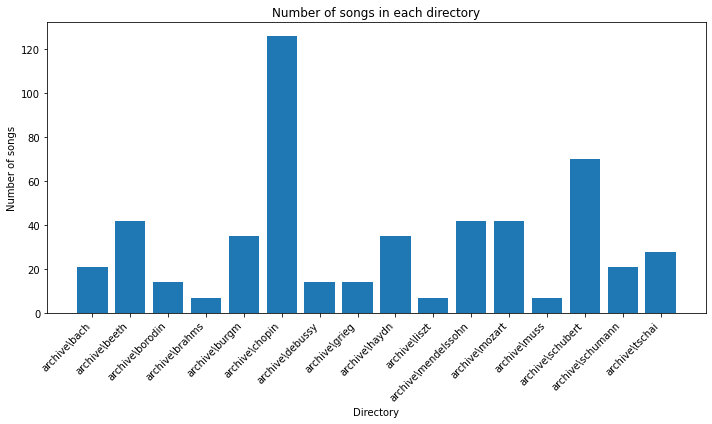

In [26]:
import os
import matplotlib.pyplot as plt

# Assuming songs_with_4_4_timing is a list of file paths
directories = [os.path.dirname(song) for song in songs_with_4_4_timing]

# Count occurrences of each directory
dir_counts = {}
for directory in directories:
    dir_counts[directory] = dir_counts.get(directory, 0) + 1

# Plotting
dirs = list(dir_counts.keys())
counts = list(dir_counts.values())

plt.figure(figsize=(10,6))
plt.bar(dirs, counts)
plt.xlabel('Directory')
plt.ylabel('Number of songs')
plt.title('Number of songs in each directory')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


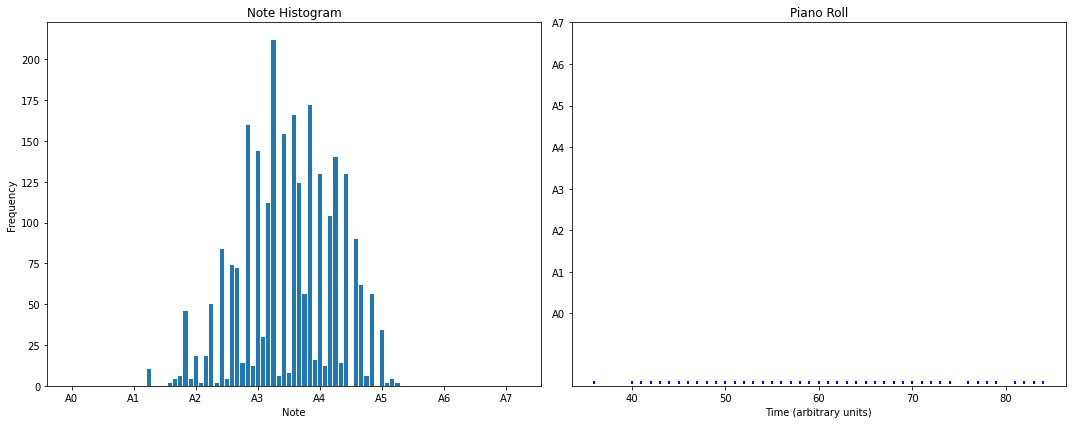

In [27]:
import mido
from mido import MidiFile
import matplotlib.pyplot as plt
import numpy as np

def visualize_midi(midi_path):
    mid = MidiFile(midi_path)

    # Extract note events
    notes = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'note_on':
                notes.append(msg.note)

    # Piano roll visualization
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.hist(notes, bins=np.arange(21, 109), align='left', rwidth=0.8)
    plt.xlabel('Note')
    plt.ylabel('Frequency')
    plt.title('Note Histogram')
    plt.xticks(np.arange(21, 109, 12), ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'])

    plt.subplot(1, 2, 2)
    plt.eventplot(notes, orientation='horizontal', linelengths=0.8, colors='b')
    plt.yticks(np.arange(21, 109, 12), ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7'])
    plt.xlabel('Time (arbitrary units)')
    plt.title('Piano Roll')

    plt.tight_layout()
    plt.show()

# Test with one of your MIDI files
midi_path = songs_with_4_4_timing[0] # Replace this if necessary
visualize_midi(midi_path)


C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=8, channel=None, data=b'Copyright 2004 by Bernd Kr\xfcger.'>; getting generic Instrument
  warnings.warn(


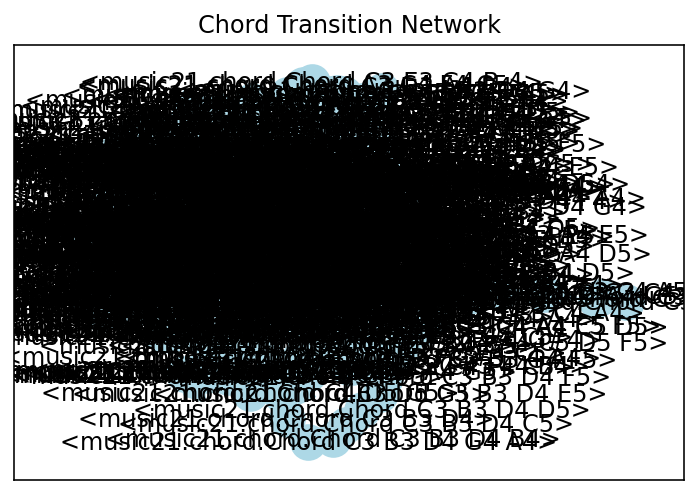

In [28]:
import music21
import networkx as nx
import matplotlib.pyplot as plt

def visualize_chord_network(midi_path):
    # Load the MIDI file into music21
    s = music21.converter.parse(midi_path)

    # Extract chords from the MIDI
    chords = s.chordify().recurse().notes
    
    # Create a graph
    G = nx.DiGraph()
    
    # Populate the graph with chord transitions
    for i in range(len(chords) - 1):
        if not G.has_edge(str(chords[i]), str(chords[i+1])):
            G.add_edge(str(chords[i]), str(chords[i+1]), weight=1)
        else:
            G[str(chords[i])][str(chords[i+1])]['weight'] += 1

    # Draw the network
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=[d['weight'] for _, _, d in G.edges(data=True)], edge_color='lightblue', arrowstyle='-|>', arrowsize=20)
    
    plt.title("Chord Transition Network")
    plt.show()

# Test with one of your MIDI files
midi_path = songs_with_4_4_timing[0]  # Replace this if necessary
visualize_chord_network(midi_path)


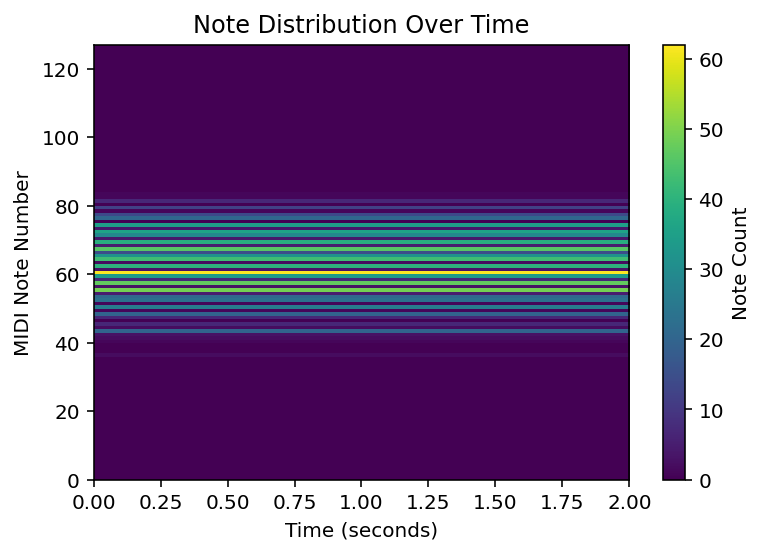

In [29]:
import music21
import numpy as np
import matplotlib.pyplot as plt

def visualize_note_distribution(midi_path):
    # Load the MIDI file into music21
    s = music21.converter.parse(midi_path)
    
    # Extract note events
    note_events = [n for n in s.recurse() if isinstance(n, music21.note.Note)]
    
    # Extract note pitches and their start time
    pitches = [n.pitch.midi for n in note_events]
    times = [n.offset for n in note_events]
    
    # Create a histogram
    time_bins = np.arange(0, max(times), 2)  # 2-second bins, adjust if needed
    pitch_bins = np.arange(0, 128)  # MIDI notes range from 0 to 127
    
    H, xedges, yedges = np.histogram2d(times, pitches, bins=[time_bins, pitch_bins])
    
    # Plot the histogram
    plt.imshow(H.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.colorbar(label='Note Count')
    plt.xlabel('Time (seconds)')
    plt.ylabel('MIDI Note Number')
    plt.title('Note Distribution Over Time')
    plt.show()

# Test with one of your MIDI files
midi_path = songs_with_4_4_timing[0]  # Replace this if necessary
visualize_note_distribution(midi_path)


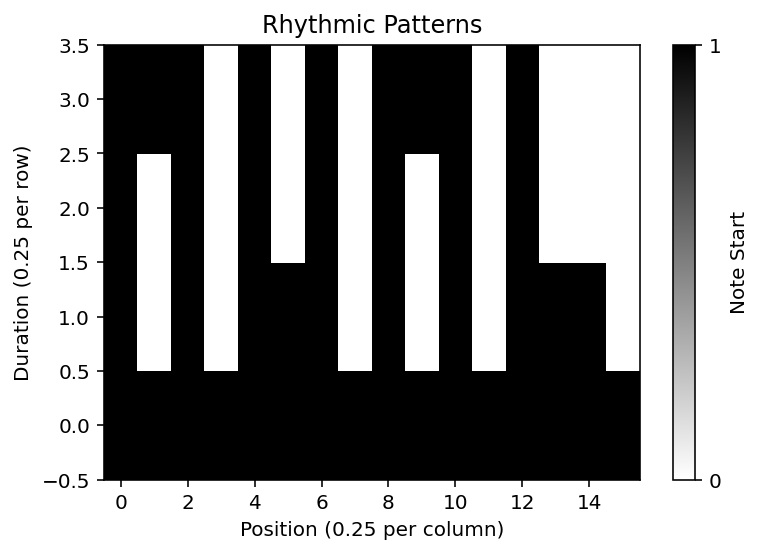

In [31]:
import music21
import numpy as np
import matplotlib.pyplot as plt

def visualize_rhythmic_patterns(midi_path, resolution=0.25):
    """Visualize rhythmic patterns using a binary heatmap.
    
    Parameters:
        midi_path (str): Path to the MIDI file.
        resolution (float): Time resolution in quarter notes. E.g., 0.25 means 16th note resolution.
    """
    s = music21.converter.parse(midi_path)
    
    # Calculate the total length in quarter notes
    total_length = max([n.offset + n.duration.quarterLength for n in s.recurse().notes])
    matrix_width = int(total_length / resolution)
    
    # Initialize a zeros matrix
    rhythm_matrix = np.zeros((int(1 / resolution), matrix_width))
    
    for n in s.recurse().notes:
        y_pos = min(int(n.duration.quarterLength / resolution) - 1, rhythm_matrix.shape[0] - 1)
        x_pos = min(int(n.offset / resolution), matrix_width - 1)
        rhythm_matrix[y_pos, x_pos] = 1
    
    # Plotting
    plt.imshow(rhythm_matrix, cmap="binary", aspect="auto", origin="lower")
    plt.xlabel('Position ({} per column)'.format(resolution))
    plt.ylabel('Duration ({} per row)'.format(resolution))
    plt.title('Rhythmic Patterns')
    plt.colorbar(ticks=[0, 1], label='Note Start')
    plt.show()

# Test with your MIDI file
midi_path = songs_with_4_4_timing[0]  
visualize_rhythmic_patterns(midi_path)



The visualization you've generated is a binary heatmap representation of rhythmic patterns in the MIDI song. It allows you to understand the rhythmic structure and motifs by presenting note durations and their onset positions in a concise manner. Here's how you can interpret it:

X-axis (Position):

Represents the temporal position of the note in the song.
Moving from left to right corresponds to moving from the beginning to the end of the song.
The resolution of this axis (i.e., the length of time each column represents) is determined by the resolution parameter. If the resolution is set to 0.25, for instance, then each column represents a 16th note's worth of time.
Y-axis (Duration):

Represents the duration of notes.
The bottom row might represent notes of 16th note duration, the next row might represent 8th notes, then quarter notes, and so on, depending on your resolution setting.
So, if there's a mark on the bottom row, it means there's a 16th note played at that time. If it's on the second row, there's an 8th note played, etc.
Marks (white spots):

Each white spot in the heatmap indicates the onset of a note.
The position on the X-axis indicates when the note starts, and the position on the Y-axis tells you the duration of that note.
Interpreting Patterns:

Horizontal Lines: Repeated rhythmic motifs of the same duration.
Vertical Lines: Chords or simultaneous notes of different durations played together.
Clusters: Sections of the song with a lot of rhythmic activity.
Absence of Marks:

Areas in the heatmap that are uniformly dark indicate rests or pauses in the song where no notes are played.
As an example, if you see a cluster of marks on the bottom-most row at the start of the X-axis, it indicates that the song starts with a rapid succession of 16th notes. If you see a mark higher up in the Y-axis, it means longer notes (like half notes or whole notes) are being played at that point in time.

Remember, this visualization only gives you insight into the rhythmic structure of the song, not its melody or harmony. It's a tool to quickly grasp how rhythms evolve and are structured throughout a piece. If there are particular patterns or rhythms that are common in the piece, they should be evident as repeated patterns in the visualization.






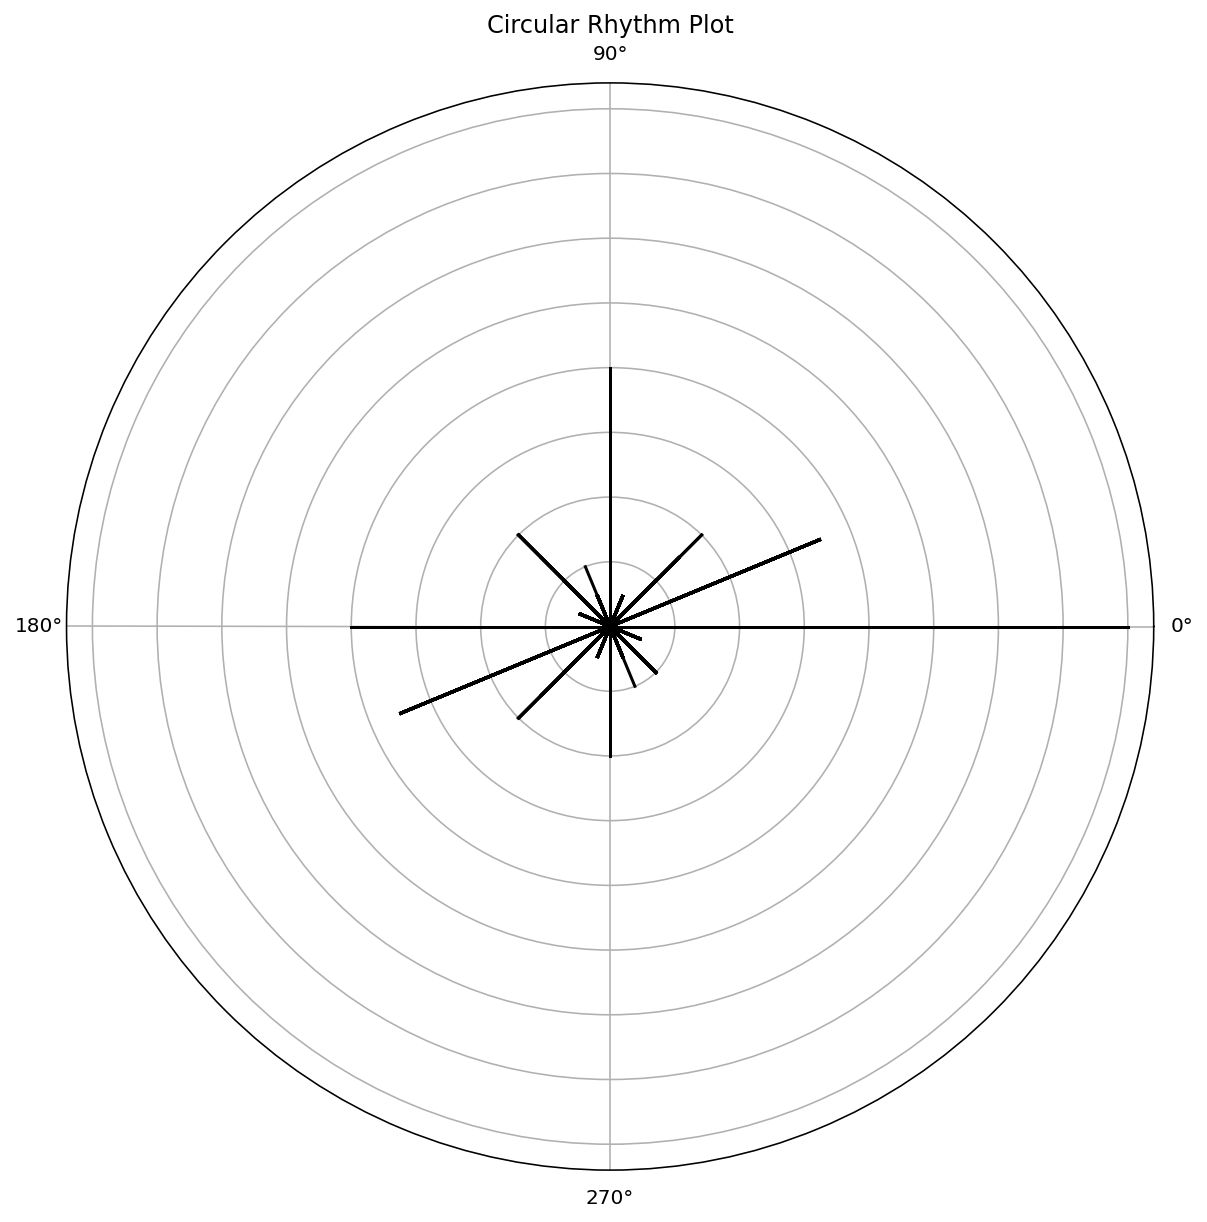

In [34]:
def circular_rhythm_plot(midi_path, measures_per_circle=4):
    # Load the MIDI file into music21
    s = music21.converter.parse(midi_path)
    
    # Extract note events
    note_events = [n for n in s.recurse() if isinstance(n, music21.note.Note)]
    
    # Get the time signature if it exists, default to 4/4
    time_signature = s.getTimeSignatures()[0] if len(s.getTimeSignatures()) > 0 else music21.meter.TimeSignature('4/4')
    
    # Calculate the total number of measures in the song
    total_measures = int(max([n.offset for n in note_events]) / (time_signature.numerator / time_signature.denominator))
    
    # Create a polar plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='polar')
    
    # Loop over the note events to plot them
    for n in note_events:
        # Calculate the radial position based on note duration
        r = n.duration.quarterLength
        # Calculate the angular position based on measure
        theta = 2 * np.pi * (n.offset / measures_per_circle)
        ax.plot([theta, theta], [0, r], color="black")  # Draw a line from the center to the outer ring based on the note duration
    
    # Configure the plot to improve appearance
    ax.set_yticklabels([])  # Hide radial ticks
    ax.set_xticks(np.linspace(0, 2*np.pi, measures_per_circle, endpoint=False))  # Set number of sectors
    ax.set_title("Circular Rhythm Plot")
    
    plt.show()

# Test with one of your MIDI files
midi_path = songs_with_4_4_timing[0]
circular_rhythm_plot(midi_path)



The Circular Rhythm Plot is a visual representation of the rhythmic patterns of a song or musical piece. This visualization provides insights into the structure and repetition of rhythms, potentially revealing patterns that might not be as noticeable when looking at standard sheet music or hearing the music.

Here's what the visualization tells you:

Circular Structure: The entire song is represented as a circle. Depending on the parameter you choose, this circle might represent the entire song, or it might represent a fixed number of measures, with multiple circles representing the song. In the code above, by default, one circle represents 4 measures.

Segments in Circle: The circle is divided into segments, with each segment corresponding to a beat or measure (depending on your chosen granularity).

Dots/Lines Within Segments: Inside each segment, you'll see lines that represent individual notes. The length (distance from the center of the circle) of each line indicates the note's duration or emphasis. A longer line means a note held for a longer time.

Interpreting the visualization:

Repeating Patterns: If you see similar patterns or clusters of lines occurring repeatedly as you move around the circle, it means there are recurring rhythmic patterns in the music.

Rhythmic Complexity: Dense clusters of lines indicate measures or segments with more rhythmic activity. If there are sparse or no lines in certain segments, it means those parts of the music have rests or fewer notes.

Song Structure: The start and end of circular segments (or entire circles, if multiple are used) can help you visually discern the structure of the song. For instance, you might notice that the rhythmic pattern of the first and last circles (or segments) is similar, indicating a repeated intro and outro.

Note Duration Patterns: If certain segments consistently have longer lines, it indicates those segments in the music tend to have longer, sustained notes.

In summary, the Circular Rhythm Plot provides a high-level visual summary of the rhythmic patterns and structures of a song, making it easier to identify repeated sections, changes in rhythm, and other structural elements of the music. It's especially useful for analyzing pieces where rhythm plays a crucial role, such as in many forms of dance music, percussive pieces, or rhythmic exercises.

In [35]:
import music21

# Load the first MIDI file from the list
midi_path = songs_with_4_4_timing[0]
midi_song = music21.converter.parse(midi_path)

# Print the parts (e.g., instruments or voices) in the MIDI file
for part in midi_song.parts:
    print(part.id)

# Print the first few measures of the first part
for measure in midi_song.parts[0].getElementsByClass('Measure')[:5]:
    print(measure)


2004228594896
2004224720512
2004183571184
2004240006448
2004225673584
2004239584128
<music21.stream.Measure 1 offset=0.0>
<music21.stream.Measure 2 offset=4.0>
<music21.stream.Measure 3 offset=8.0>
<music21.stream.Measure 4 offset=12.0>
<music21.stream.Measure 5 offset=16.0>


In [37]:
import music21

# Assuming songs_with_4_4_timing is a list of MIDI file paths
midi_path = songs_with_4_4_timing[0]

# Parse the MIDI file with music21
score = music21.converter.parse(midi_path)

# Extract all note events
note_events = [n for n in score.recurse() if isinstance(n, music21.note.Note)]

# Print attributes of the first few notes
for note in note_events[:10]:  # Adjust as necessary
    print("Pitch:", note.pitch.nameWithOctave)
    print("MIDI Number:", note.pitch.midi)
    print("Start Time (Offset):", note.offset)
    print("Duration:", note.duration.quarterLength)
    print("Velocity:", note.volume.velocity)
    print("---------------")


Pitch: G4
MIDI Number: 67
Start Time (Offset): 0.5
Duration: 0.25
Velocity: 56
---------------
Pitch: C5
MIDI Number: 72
Start Time (Offset): 0.75
Duration: 0.25
Velocity: 60
---------------
Pitch: E5
MIDI Number: 76
Start Time (Offset): 1.0
Duration: 0.25
Velocity: 63
---------------
Pitch: G4
MIDI Number: 67
Start Time (Offset): 1.25
Duration: 0.25
Velocity: 50
---------------
Pitch: C5
MIDI Number: 72
Start Time (Offset): 1.5
Duration: 0.25
Velocity: 47
---------------
Pitch: E5
MIDI Number: 76
Start Time (Offset): 1.75
Duration: 0.25
Velocity: 47
---------------
Pitch: G4
MIDI Number: 67
Start Time (Offset): 2.5
Duration: 0.25
Velocity: 56
---------------
Pitch: C5
MIDI Number: 72
Start Time (Offset): 2.75
Duration: 0.25
Velocity: 60
---------------
Pitch: E5
MIDI Number: 76
Start Time (Offset): 3.0
Duration: 0.25
Velocity: 62
---------------
Pitch: G4
MIDI Number: 67
Start Time (Offset): 3.25
Duration: 0.25
Velocity: 50
---------------


In [38]:
import music21

def ensure_start_at_zero(midi_path):
    # Load the MIDI file into music21
    s = music21.converter.parse(midi_path)
    
    # Get the minimum offset where a note or chord starts
    min_offset = min([n.offset for n in s.recurse() if isinstance(n, (music21.note.Note, music21.chord.Chord))])
    
    # If the minimum offset isn't zero, adjust all offsets
    if min_offset != 0:
        for element in s.recurse():
            element.offset -= min_offset
    
    # Save the adjusted MIDI file with a new name
    adjusted_path = os.path.join(os.path.dirname(midi_path), 'adjusted_' + os.path.basename(midi_path))
    s.write('midi', fp=adjusted_path)

for midi_path in songs_with_4_4_timing:
    ensure_start_at_zero(midi_path)


C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=7, channel=None, data=b'Copyright 2004 by Bernd Kr\xfcger.'>; getting generic Instrument
  warnings.warn(
C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Pr\xe4ludium und Fuge in D-Dur, BWV 850'>; getting generic Instrument
  warnings.warn(
C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=8, channel=None, data=b'Copyright 1997 by Bernd Kr\xfcger.'>; getting generic Instrument
  warnings.warn(
C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrume

C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2002 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Tr\xe4umerei'>; getting generic Instrument
  warnings.warn(
C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Schumann:   Fr\xf6hlicher Landmann, von der Arbeit zur\xfcckkehrend'>; getting generic Instrument
  warnings.warn(
C:\Users\paperspace\anaconda3\lib\site-packages\music21\midi\translate.py:863: TranslateWarning: Unable to determin

import music21
import os

def ensure_start_at_zero(midi_path):
    # Load the MIDI file into music21
    s = music21.converter.parse(midi_path)
    
    # Get the minimum offset where a note or chord starts
    min_offset = min([n.offset for n in s.recurse() if isinstance(n, (music21.note.Note, music21.chord.Chord))])
    
    # If the minimum offset isn't zero, adjust all offsets
    if min_offset != 0:
        for element in s.recurse():
            element.offset -= min_offset
    
    # Save the adjusted MIDI file with a new name
    adjusted_path = os.path.join(os.path.dirname(midi_path), 'adjusted_' + os.path.basename(midi_path))
    s.write('midi', fp=adjusted_path)
    
    return adjusted_path

adjusted_midi_paths = [ensure_start_at_zero(midi_path) for midi_path in songs_with_4_4_timing]

# After adjusting, print the note information for the first adjusted MIDI
midi_path = adjusted_midi_paths[0]
score = music21.converter.parse(midi_path)
note_events = [n for n in score.recurse() if isinstance(n, music21.note.Note)]

for note in note_events[:10]:  # Adjust as necessary
    print("Pitch:", note.pitch.nameWithOctave)
    print("MIDI Number:", note.pitch.midi)
    print("Start Time (Offset):", note.offset)
    print("Duration:", note.duration.quarterLength)
    print("Velocity:", note.volume.velocity)
    print("---------------")


In [ ]:
# After adjusting, print the note information for the first adjusted MIDI
midi_path = adjusted_midi_paths[0]
score = music21.converter.parse(midi_path)
note_events = [n for n in score.recurse() if isinstance(n, music21.note.Note)]

for note in note_events[:10]:  # Adjust as necessary
    print("Pitch:", note.pitch.nameWithOctave)
    print("MIDI Number:", note.pitch.midi)
    print("Start Time (Offset):", note.offset)
    print("Duration:", note.duration.quarterLength)
    print("Velocity:", note.volume.velocity)
    print("---------------")

#  Dealing with Chords

The code you provided seems to focus on extracting chord information from MIDI data, which is consistent with the process you described earlier. Here's a breakdown of what each part of the code does:

MIDIChord class initialization: It sets up mappings for pitch classes, chord maps, insiders, outsiders, etc. This information is used to determine chord quality and provide scoring based on notes found in the MIDI.

note2pianoroll function: Converts notes from a MIDI into a pianoroll representation, which is a binary matrix indicating the presence of notes at each tick.

sequencing function: For each chroma (a 12-dimensional representation indicating the presence of each pitch class), this function finds possible root notes for the chord candidates.

scoring function: Given chord candidates, it scores each one based on its quality and notes, considering whether the notes are insiders, outsiders, or perfectly match the chord's map.

find_chord function: For a given segment of the pianoroll, this function determines the most probable chord by first finding chord candidates and then scoring each one.

greedy function: It processes the entire song's chords using a greedy algorithm. This function iteratively selects the chord that extends the furthest in time for each segment of the song.

extract function: This is the main function that processes the MIDI notes to extract chords. It first converts the notes into a pianoroll and then iteratively uses the find_chord function to get chord candidates. Finally, it uses the greedy function to determine the chord sequence for the entire song.

From what's presented, the code seems to employ a reasonably comprehensive strategy for chord extraction, using both musical knowledge (defined chord structures) and algorithmic logic (greedy selection). The miditoolkit library is utilized extensively to parse, process, and handle MIDI data.

To match this with the context provided in the original description, this code corresponds to the "way to get these chords from a MIDI score or a MIDI performance in the data preparation process." If you intend to integrate this with a transformer-based model like the one you described earlier, you would take the chord outputs from this extraction process and convert them into tokens suitable for input into your model.

The described preprocessing for MIDI files involves the representation of chord events as a separate sequence of tokens, but it's important to remember that the chords are distinct from note-on events. The chords serve as a type of context or conditioning for the subsequent generation of notes by the transformer model. Here's how the transformer might process and use the chords:

Contextual Conditioning: The chord tokens provide the transformer with contextual information about the harmonic content for a given span of time in the MIDI sequence. The transformer uses this context when deciding which notes to generate. In music theory, certain notes tend to be emphasized or preferred over others given a specific chord. For instance, if the chord is C Major, the notes C, E, and G are more likely to be emphasized.

Chord vs. Note Generation: While the chord event token specifies the harmonic context, the actual note generation still relies on the Note-on and Note-off events. The transformer would generate specific notes based on both the preceding notes and the given chord context.

Which Note to Predict: The transformer doesn't inherently prioritize the top, bottom, or middle note of a chord. Instead, it learns from the training data how notes are typically structured given a chord context. If, in the training data, melodies frequently emphasize the root note of the chord, the model will likely produce similar patterns. But, if melodies often play around with chord extensions or other non-chord tones, then the transformer might produce more varied results.

Training Data Dependency: The behavior of the transformer largely depends on the training data. If the training MIDI files often emphasize the bass note of the chord in their melodies, the model might learn to do the same. The same goes for any other patterns present in the training data.

Chord Extensions and Non-Chord Tones: Even if a C Major chord is specified, it doesn't mean only C, E, and G will be played. Music frequently involves chord extensions (like 7ths, 9ths, etc.) and non-chord tones (like passing tones and neighbor tones). The transformer will learn these complex behaviors from the training data.

In summary, by encoding the chord information as input tokens, you're giving the transformer more knowledge about the harmonic context of a given passage, which helps in generating more harmonically coherent outputs. However, exactly how the model uses this information (which notes it emphasizes or chooses) is learned from patterns present in the training data.






In [50]:
import miditoolkit
import numpy as np

class MIDIChord(object):
    def __init__(self):
        # define pitch classes
        self.PITCH_CLASSES = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
        # define chord maps (required)
        self.CHORD_MAPS = {'maj': [0, 4],
                           'min': [0, 3],
                           'dim': [0, 3, 6],
                           'aug': [0, 4, 8],
                           'dom': [0, 4, 7, 10]}
        # define chord insiders (+1)
        self.CHORD_INSIDERS = {'maj': [7],
                               'min': [7],
                               'dim': [9],
                               'aug': [],
                               'dom': []}
        # define chord outsiders (-1)
        self.CHORD_OUTSIDERS_1 = {'maj': [2, 5, 9],
                                  'min': [2, 5, 8],
                                  'dim': [2, 5, 10],
                                  'aug': [2, 5, 9],
                                  'dom': [2, 5, 9]}
        # define chord outsiders (-2)
        self.CHORD_OUTSIDERS_2 = {'maj': [1, 3, 6, 8, 10],
                                  'min': [1, 4, 6, 9, 11],
                                  'dim': [1, 4, 7, 8, 11],
                                  'aug': [1, 3, 6, 7, 10],
                                  'dom': [1, 3, 6, 8, 11]}

    def note2pianoroll(self, notes, max_tick, ticks_per_beat):
        return miditoolkit.pianoroll.parser.notes2pianoroll(
                note_stream_ori=notes,
                max_tick=max_tick,
                ticks_per_beat=ticks_per_beat)

    def sequencing(self, chroma):
        candidates = {}
        for index in range(len(chroma)):
            if chroma[index]:
                root_note = index
                _chroma = np.roll(chroma, -root_note)
                sequence = np.where(_chroma == 1)[0]
                candidates[root_note] = list(sequence)
        return candidates

    def scoring(self, candidates):
        scores = {}
        qualities = {}
        for root_note, sequence in candidates.items():
            if 3 not in sequence and 4 not in sequence:
                scores[root_note] = -100
                qualities[root_note] = 'None'
            elif 3 in sequence and 4 in sequence:
                scores[root_note] = -100
                qualities[root_note] = 'None'
            else:
                # decide quality
                if 3 in sequence:
                    if 6 in sequence:
                        quality = 'dim'
                    else:
                        quality = 'min'
                elif 4 in sequence:
                    if 8 in sequence:
                        quality = 'aug'
                    else:
                        if 7 in sequence and 10 in sequence:
                            quality = 'dom'
                        else:
                            quality = 'maj'
                # decide score
                maps = self.CHORD_MAPS.get(quality)
                _notes = [n for n in sequence if n not in maps]
                score = 0
                for n in _notes:
                    if n in self.CHORD_OUTSIDERS_1.get(quality):
                        score -= 1
                    elif n in self.CHORD_OUTSIDERS_2.get(quality):
                        score -= 2
                    elif n in self.CHORD_INSIDERS.get(quality):
                        score += 1
                scores[root_note] = score
                qualities[root_note] = quality
        return scores, qualities

    def find_chord(self, pianoroll):
        chroma = miditoolkit.pianoroll.utils.tochroma(pianoroll=pianoroll)
        chroma = np.sum(chroma, axis=0)
        chroma = np.array([1 if c else 0 for c in chroma])
        if np.sum(chroma) == 0:
            return 'N', 'N', 'N', 0
        else:
            candidates = self.sequencing(chroma=chroma)
            scores, qualities = self.scoring(candidates=candidates)
            # bass note
            sorted_notes = []
            for i, v in enumerate(np.sum(pianoroll, axis=0)):
                if v > 0:
                    sorted_notes.append(int(i%12))
            bass_note = sorted_notes[0]
            # root note
            __root_note = []
            _max = max(scores.values())
            for _root_note, score in scores.items():
                if score == _max:
                    __root_note.append(_root_note)
            if len(__root_note) == 1:
                root_note = __root_note[0]
            else:
                #TODO: what should i do
                for n in sorted_notes:
                    if n in __root_note:
                        root_note = n
                        break
            # quality
            quality = qualities.get(root_note)
            sequence = candidates.get(root_note)
            # score
            score = scores.get(root_note)
            return self.PITCH_CLASSES[root_note], quality, self.PITCH_CLASSES[bass_note], score

    def greedy(self, candidates, max_tick, min_length):
        chords = []
        # start from 0
        start_tick = 0
        while start_tick < max_tick:
            _candidates = candidates.get(start_tick)
            _candidates = sorted(_candidates.items(), key=lambda x: (x[1][-1], x[0]))
            # choose
            end_tick, (root_note, quality, bass_note, _) = _candidates[-1]
            if root_note == bass_note:
                chord = '{}:{}'.format(root_note, quality)
            else:
                chord = '{}:{}/{}'.format(root_note, quality, bass_note)
            chords.append([start_tick, end_tick, chord])
            start_tick = end_tick
        # remove :None
        temp = chords
        while ':None' in temp[0][-1]:
            try:
                temp[1][0] = temp[0][0]
                del temp[0]
            except:
                print('NO CHORD')
                return []
        temp2 = []
        for chord in temp:
            if ':None' not in chord[-1]:
                temp2.append(chord)
            else:
                temp2[-1][1] = chord[1]
        return temp2

    def extract(self, notes):
        # read
        max_tick = max([n.end for n in notes])
        ticks_per_beat = 480
        pianoroll = self.note2pianoroll(
            notes=notes, 
            max_tick=max_tick, 
            ticks_per_beat=ticks_per_beat)
        # get lots of candidates
        candidates = {}
        # the shortest: 2 beat, longest: 4 beat
        for interval in [4, 2]:
            for start_tick in range(0, max_tick, ticks_per_beat):
                # set target pianoroll
                end_tick = int(ticks_per_beat * interval + start_tick)
                if end_tick > max_tick:
                    end_tick = max_tick
                _pianoroll = pianoroll[start_tick:end_tick, :]
                # find chord
                root_note, quality, bass_note, score = self.find_chord(pianoroll=_pianoroll)
                # save
                if start_tick not in candidates:
                    candidates[start_tick] = {}
                    candidates[start_tick][end_tick] = (root_note, quality, bass_note, score)
                else:
                    if end_tick not in candidates[start_tick]:
                        candidates[start_tick][end_tick] = (root_note, quality, bass_note, score)
        # greedy
        chords = self.greedy(candidates=candidates, 
                             max_tick=max_tick, 
                             min_length=ticks_per_beat)
        return chords